In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv("dataset.csv")

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [7]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [8]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])
data["Partner"]=le.fit_transform(data["Partner"])
data["Dependents"]=le.fit_transform(data["Dependents"])
data["PhoneService"]=le.fit_transform(data["PhoneService"])
data["MultipleLines"]=le.fit_transform(data["MultipleLines"])
data["InternetService"]=le.fit_transform(data["InternetService"])
data["OnlineSecurity"]=le.fit_transform(data["OnlineSecurity"])
data["DeviceProtection"]=le.fit_transform(data["DeviceProtection"])
data["TechSupport"]=le.fit_transform(data["TechSupport"])
data["StreamingTV"]=le.fit_transform(data["StreamingTV"])
data["StreamingMovies"]=le.fit_transform(data["StreamingMovies"])
data["Contract"]=le.fit_transform(data["Contract"])
data["PaperlessBilling"]=le.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"]=le.fit_transform(data["PaymentMethod"])
data["Churn"]=le.fit_transform(data["Churn"])

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [12]:
data.drop(columns='customerID', inplace=True)

In [13]:
x=data.iloc[:,0:19].values
y=data.iloc[:,19:20].values

In [14]:
x

array([[0, 0, 1, ..., 2, 29.85, 29.85],
       [1, 0, 0, ..., 3, 56.95, 1889.5],
       [1, 0, 0, ..., 3, 53.85, 108.15],
       ...,
       [0, 0, 1, ..., 2, 29.6, 346.45],
       [1, 1, 1, ..., 3, 74.4, 306.6],
       [1, 0, 0, ..., 0, 105.65, 6844.5]], dtype=object)

In [15]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [16]:
one=OneHotEncoder()
a=one.fit_transform(x[:,6:7]).toarray()
b=one.fit_transform(x[:,7:8]).toarray()
c=one.fit_transform(x[:,8:9]).toarray()
d=one.fit_transform(x[:,9:10]).toarray()
e=one.fit_transform(x[:,10:11]).toarray()
f=one.fit_transform(x[:,11:12]).toarray()
g=one.fit_transform(x[:,12:13]).toarray()
h=one.fit_transform(x[:,13:14]).toarray()
i=one.fit_transform(x[:,14:15]).toarray()
j=one.fit_transform(x[:,16:17]).toarray()
x=np.delete(x,[6,7,8,9,10,11,12,13,14,16],axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x),axis=1)

In [17]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Reshape y into 1-dimensional array
y_1d = y.ravel()

# create 3 categories based on the distribution of y
y = pd.cut(y_1d, bins=3, labels=False)

rus = RandomUnderSampler(random_state=42)
x_resample, y_resample = rus.fit_resample(x, y)



In [18]:
x_resample

array([[1.0, 0.0, 0.0, ..., 0, 20.15, 20.15],
       [1.0, 0.0, 0.0, ..., 0, 19.3, 1414.8],
       [1.0, 0.0, 0.0, ..., 1, 45.75, 344.2],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 75.75, 75.75],
       [0.0, 0.0, 1.0, ..., 1, 102.95, 6886.25],
       [0.0, 0.0, 1.0, ..., 1, 74.4, 306.6]], dtype=object)

In [19]:
y_resample

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [20]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

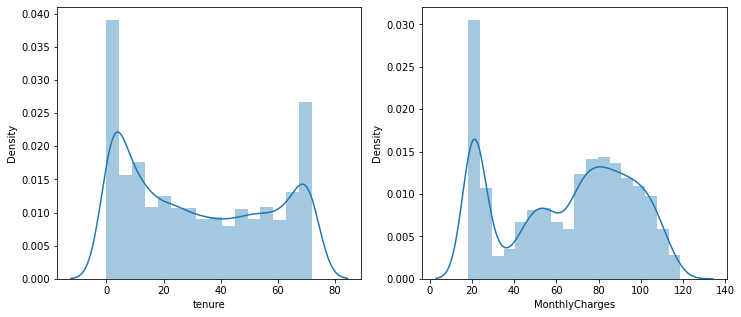

In [21]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["tenure"])
plt.subplot(1,2,2)
sns.distplot(data["MonthlyCharges"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

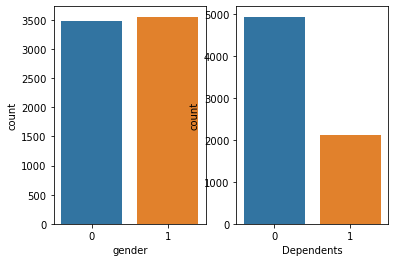

In [22]:
plt.subplot(1,2,1)
sns.countplot(data["gender"])
plt.subplot(1,2,2)
sns.countplot(data["Dependents"])

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

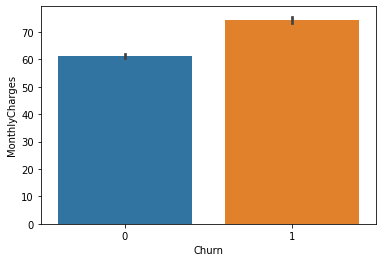

In [23]:
sns.barplot(x='Churn', y='MonthlyCharges', data=data)

<AxesSubplot:>

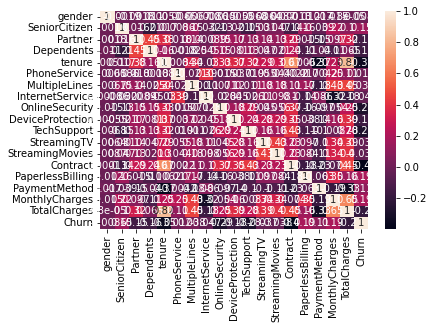

In [24]:
sns.heatmap(data.corr(),annot=True)

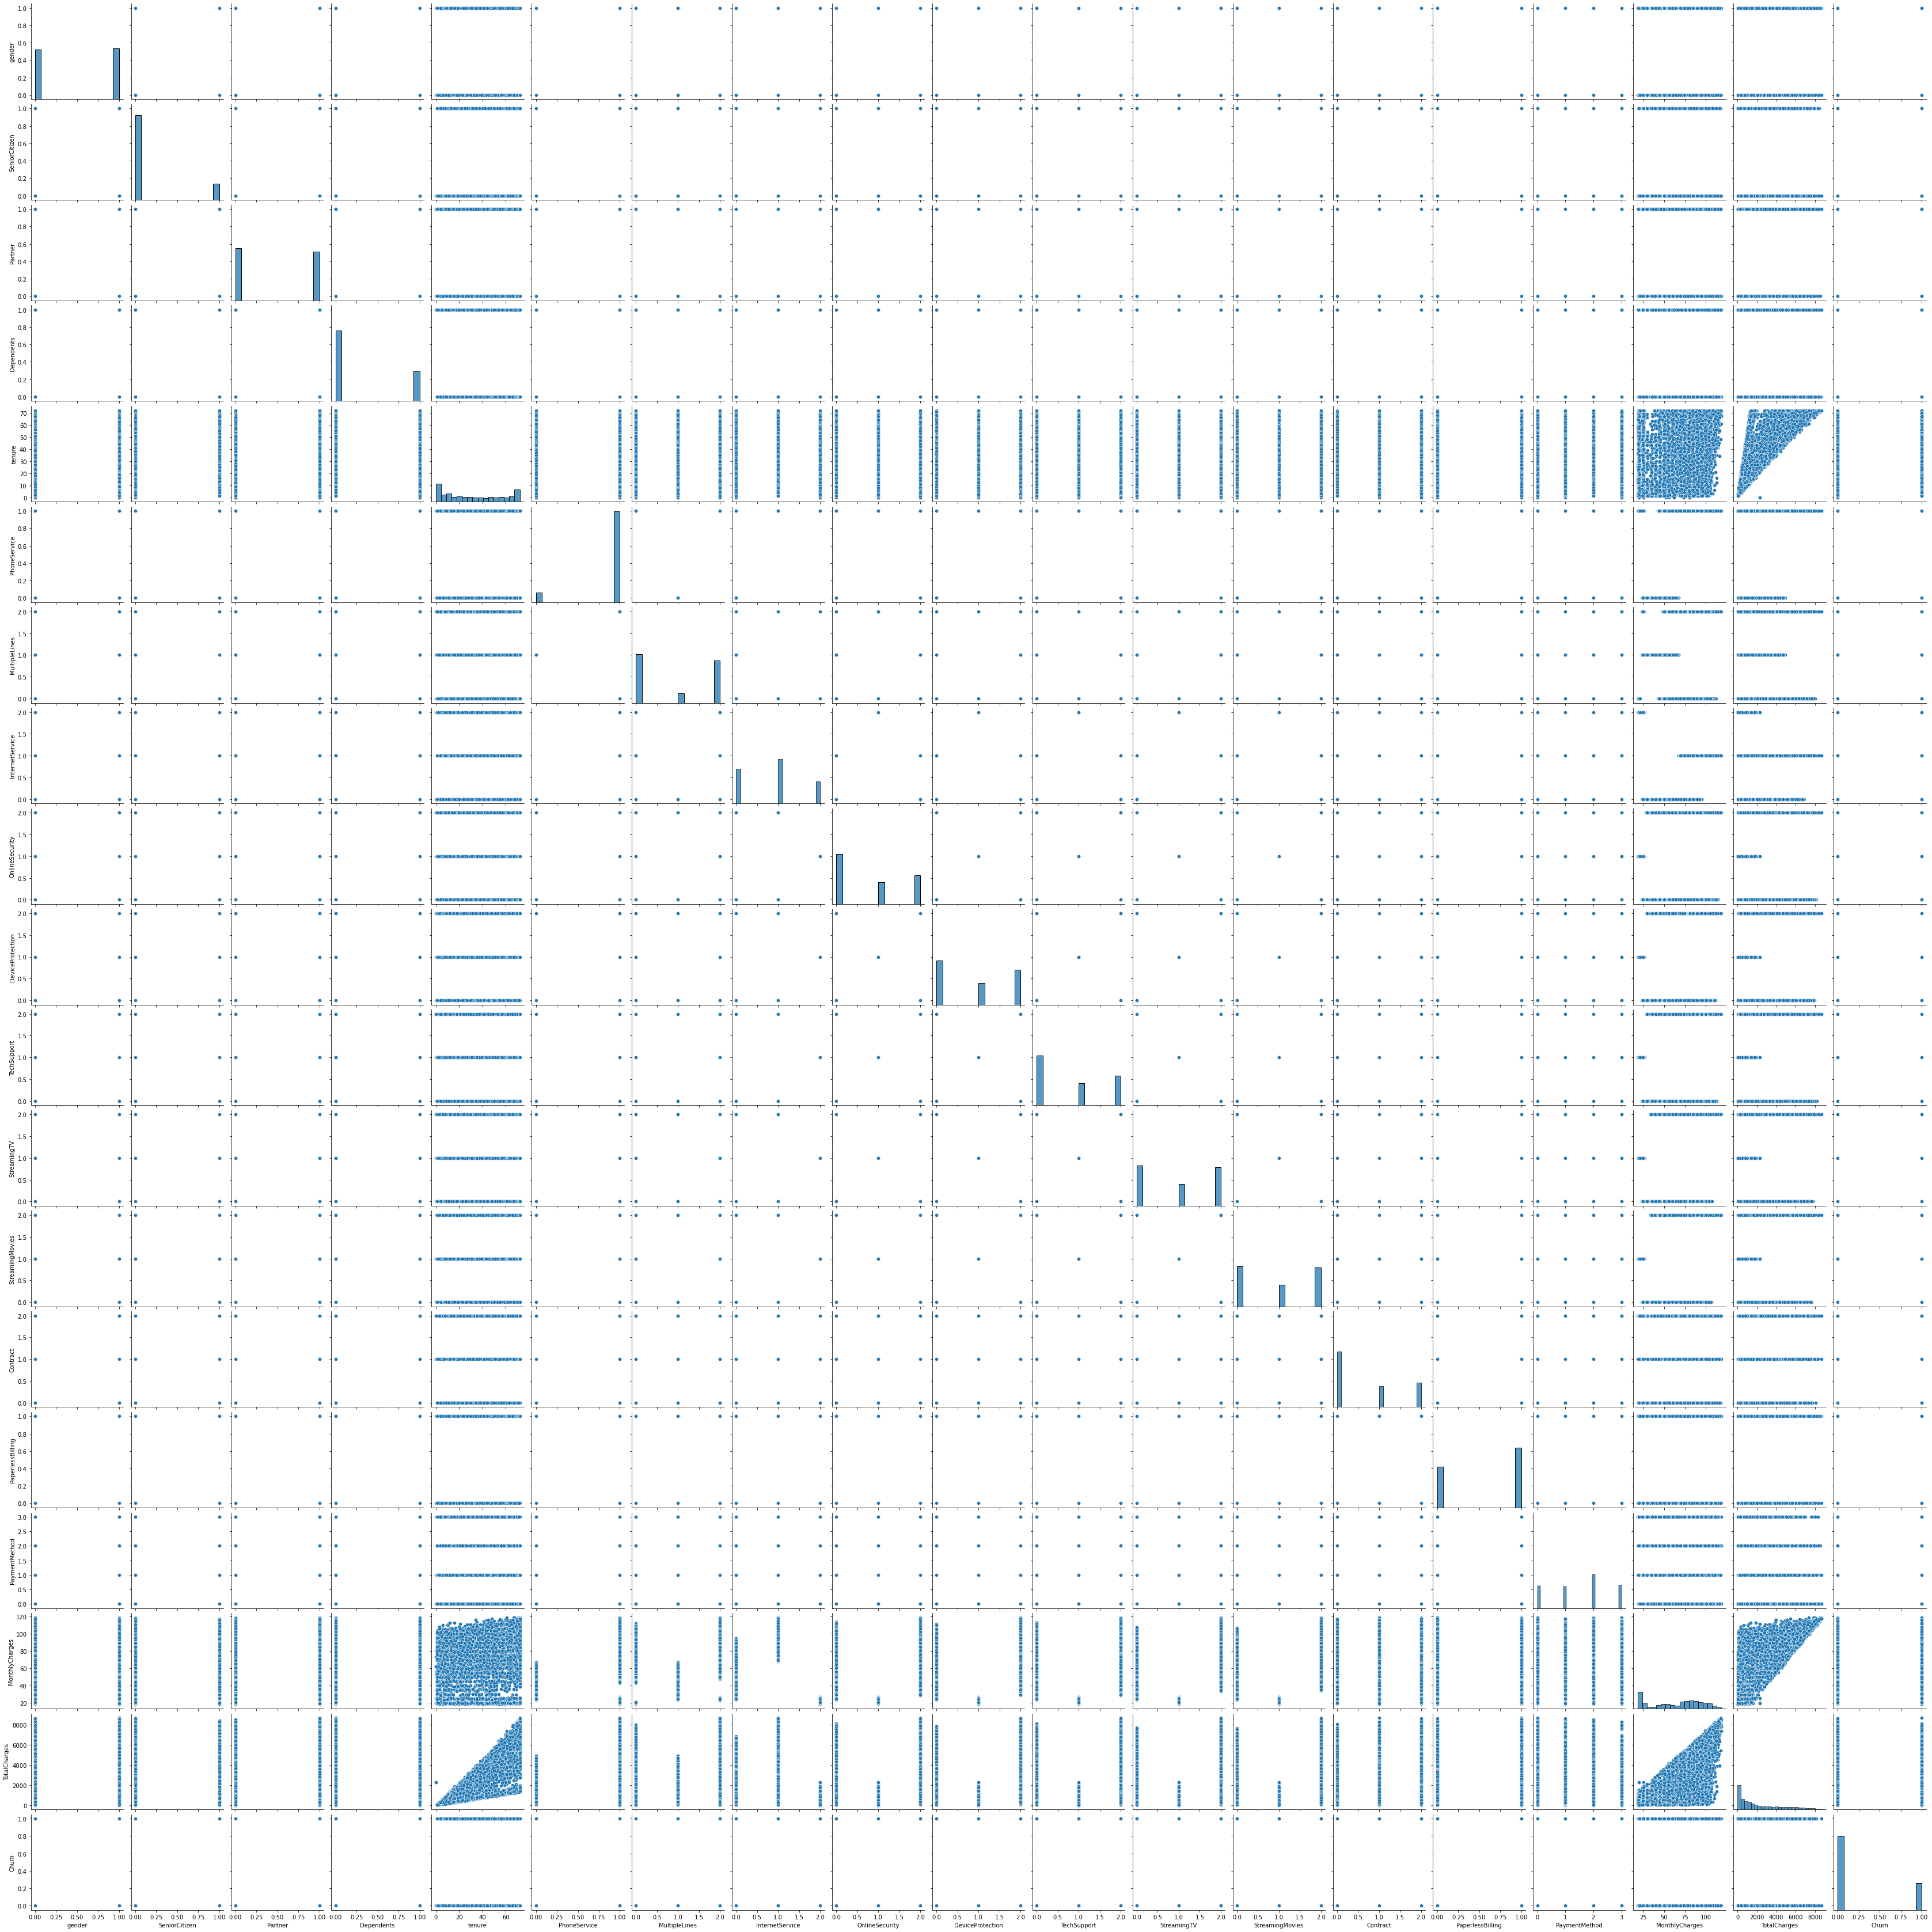

In [25]:
sns.pairplot(data=data,markers=["^","v"],palette="inferno")

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=0)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2990, 40)
(748, 40)
(2990,)
(748,)


In [28]:
# Import necessary libraries
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train.shape


(2990, 40)

In [29]:
#importing and building the LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
def logreg(x_train,x_test,y_train,y_test):
    lr=LogisticRegression(random_state=0)
    lr.fit(x_train,y_train)
    y_lr_tr=lr.predict(x_train)
    print(accuracy_score(y_lr_tr,y_train))
    ypred_lr=lr.predict(x_test)
    print(accuracy_score(ypred_lr,y_test))
    print("***Logistic Regression***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_lr))
    print("Classification Report")
    print(classification_report(y_test,ypred_lr))
    #printing the train and test accuracty respectively
logreg(x_train,x_test,y_train,y_test)

0.7779264214046823
0.7540106951871658
***Logistic Regression***
Confusion_Matrix
[[267 107]
 [ 77 297]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       374
           2       0.74      0.79      0.76       374

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748



In [30]:
#importing and building the Decision tree model
def decisionTree(x_train,x_test,y_train,y_test):
    dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
    dtc.fit(x_train,y_train)
    y_dt_tr=dtc.predict(x_train)
    print(accuracy_score(y_dt_tr,y_train))
    ypred_dt=dtc.predict(x_test)
    print(accuracy_score(ypred_dt,y_test))
    print("***Decision Tree***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_dt))
    print("Classification Report")
    print(classification_report(y_test,ypred_dt))
    #printing the train and test accuracty respectively
decisionTree(x_train,x_test,y_train,y_test) 

0.9969899665551839
0.696524064171123
***Decision Tree***
Confusion_Matrix
[[267 107]
 [120 254]]
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       374
           2       0.70      0.68      0.69       374

    accuracy                           0.70       748
   macro avg       0.70      0.70      0.70       748
weighted avg       0.70      0.70      0.70       748



In [31]:
#importing and building the random forest model
def RandomForest(x_train,x_test,y_train,y_test):
    rf=RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
    rf.fit(x_train,y_train)
    y_rf_tr=rf.predict(x_train)
    print(accuracy_score(y_rf_tr,y_train))
    ypred_rf=rf.predict(x_test)
    print(accuracy_score(ypred_rf,y_test))
    print("***Random Forest***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_rf))
    print("Classification Report")
    print(classification_report(y_test,ypred_rf))
    #printing the train and test accuracty respectively
RandomForest(x_train,x_test,y_train,y_test)

0.982943143812709
0.7192513368983957
***Random Forest***
Confusion_Matrix
[[289  85]
 [125 249]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       374
           2       0.75      0.67      0.70       374

    accuracy                           0.72       748
   macro avg       0.72      0.72      0.72       748
weighted avg       0.72      0.72      0.72       748



In [32]:
#importing and building the KNN
def KNN(x_train,x_test,y_train,y_test):
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_knn_tr=knn.predict(x_train)
    print(accuracy_score(y_knn_tr,y_train))
    ypred_knn=knn.predict(x_test)
    print(accuracy_score(ypred_knn,y_test))
    print("***KNN***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_knn))
    print("Classification Report")
    print(classification_report(y_test,ypred_knn))
    #printing the train and test accuracty respectivel
KNN(x_train,x_test,y_train,y_test)


0.808361204013378
0.733957219251337
***KNN***
Confusion_Matrix
[[259 115]
 [ 84 290]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       374
           2       0.72      0.78      0.74       374

    accuracy                           0.73       748
   macro avg       0.74      0.73      0.73       748
weighted avg       0.74      0.73      0.73       748



In [33]:
#importing and building the SVM
def SVM(x_train,x_test,y_train,y_test):
    svm=SVC(kernel="linear")
    svm.fit(x_train,y_train)
    y_svm_tr=svm.predict(x_train)
    print(accuracy_score(y_svm_tr,y_train))
    ypred_svm=svm.predict(x_test)
    print(accuracy_score(ypred_svm,y_test))
    print("***SUPPORT VECTOR MACHINE***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_svm))
    print("Classification Report")
    print(classification_report(y_test,ypred_svm))
    #printing the train and test accuracty respectively
SVM(x_train,x_test,y_train,y_test)

0.7575250836120402
0.733957219251337
***SUPPORT VECTOR MACHINE***
Confusion_Matrix
[[248 126]
 [ 73 301]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       374
           2       0.70      0.80      0.75       374

    accuracy                           0.73       748
   macro avg       0.74      0.73      0.73       748
weighted avg       0.74      0.73      0.73       748



In [34]:
from keras.models import Sequential
from keras.layers import Dense

#Initialising the ANN
classifier=Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=30,activation='relu',input_dim=40))
#Adding the Second hidden layer
classifier.add(Dense(units=30,activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#fitting the ANN to the TRaining set
model_history=classifier.fit(x_train,y_train,batch_size=10,validation_split=0.33,epochs=200)
ann_pred=classifier.predict(x_test)
ann_pred=(ann_pred>0.5)
ann_pred
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

Epoch 1/200
201/201 [==============================] - 15s 16ms/step - loss: -2.8252 - accuracy: 0.1762 - val_loss: -12.8566 - val_accuracy: 0.1945
Epoch 2/200
201/201 [==============================] - 2s 11ms/step - loss: -77.1994 - accuracy: 0.2207 - val_loss: -193.7694 - val_accuracy: 0.2280
Epoch 3/200
201/201 [==============================] - 3s 13ms/step - loss: -459.3948 - accuracy: 0.2317 - val_loss: -816.6793 - val_accuracy: 0.2533
Epoch 4/200
201/201 [==============================] - 3s 13ms/step - loss: -1397.4987 - accuracy: 0.2451 - val_loss: -2089.0452 - val_accuracy: 0.2584
Epoch 5/200
201/201 [==============================] - 3s 15ms/step - loss: -3050.8582 - accuracy: 0.2491 - val_loss: -4101.6450 - val_accuracy: 0.2533
Epoch 6/200
201/201 [==============================] - 2s 12ms/step - loss: -5582.2866 - accuracy: 0.2456 - val_loss: -7057.5190 - val_accuracy: 0.2634
Epoch 7/200
201/201 [==============================] - 2s 11ms/step - loss: -9048.9688 - accuracy

Epoch 54/200
201/201 [==============================] - 2s 8ms/step - loss: -1922675.8750 - accuracy: 0.2376 - val_loss: -1941025.6250 - val_accuracy: 0.1895
Epoch 55/200
201/201 [==============================] - 2s 9ms/step - loss: -2013884.8750 - accuracy: 0.2376 - val_loss: -2031938.7500 - val_accuracy: 0.2766
Epoch 56/200
201/201 [==============================] - 2s 9ms/step - loss: -2107184.7500 - accuracy: 0.2481 - val_loss: -2126076.2500 - val_accuracy: 0.2452
Epoch 57/200
201/201 [==============================] - 2s 9ms/step - loss: -2203711.5000 - accuracy: 0.2501 - val_loss: -2222405.7500 - val_accuracy: 0.2634
Epoch 58/200
201/201 [==============================] - 2s 9ms/step - loss: -2302381.0000 - accuracy: 0.2391 - val_loss: -2319736.7500 - val_accuracy: 0.2199
Epoch 59/200
201/201 [==============================] - 2s 9ms/step - loss: -2404244.5000 - accuracy: 0.2481 - val_loss: -2422185.0000 - val_accuracy: 0.2097
Epoch 60/200
201/201 [==============================

Epoch 106/200
201/201 [==============================] - 1s 7ms/step - loss: -10671875.0000 - accuracy: 0.2526 - val_loss: -10653196.0000 - val_accuracy: 0.1814
Epoch 107/200
201/201 [==============================] - 2s 9ms/step - loss: -10939076.0000 - accuracy: 0.2456 - val_loss: -10917693.0000 - val_accuracy: 0.2756
Epoch 108/200
201/201 [==============================] - 2s 9ms/step - loss: -11209491.0000 - accuracy: 0.2426 - val_loss: -11189555.0000 - val_accuracy: 0.2746
Epoch 109/200
201/201 [==============================] - 2s 9ms/step - loss: -11484980.0000 - accuracy: 0.2491 - val_loss: -11461917.0000 - val_accuracy: 0.2705
Epoch 110/200
201/201 [==============================] - 2s 9ms/step - loss: -11763487.0000 - accuracy: 0.2486 - val_loss: -11737345.0000 - val_accuracy: 0.2513
Epoch 111/200
201/201 [==============================] - 2s 10ms/step - loss: -12045296.0000 - accuracy: 0.2491 - val_loss: -12019646.0000 - val_accuracy: 0.2513
Epoch 112/200
201/201 [==========

Epoch 157/200
201/201 [==============================] - 2s 8ms/step - loss: -29956222.0000 - accuracy: 0.2451 - val_loss: -29785214.0000 - val_accuracy: 0.2178
Epoch 158/200
201/201 [==============================] - 2s 10ms/step - loss: -30467384.0000 - accuracy: 0.2466 - val_loss: -30297796.0000 - val_accuracy: 0.1945
Epoch 159/200
201/201 [==============================] - 2s 9ms/step - loss: -30979182.0000 - accuracy: 0.2421 - val_loss: -30805714.0000 - val_accuracy: 0.1905
Epoch 160/200
201/201 [==============================] - 2s 9ms/step - loss: -31496402.0000 - accuracy: 0.2486 - val_loss: -31311582.0000 - val_accuracy: 0.2594
Epoch 161/200
201/201 [==============================] - 2s 9ms/step - loss: -32026394.0000 - accuracy: 0.2451 - val_loss: -31837002.0000 - val_accuracy: 0.2685
Epoch 162/200
201/201 [==============================] - 2s 9ms/step - loss: -32557920.0000 - accuracy: 0.2416 - val_loss: -32363086.0000 - val_accuracy: 0.2847
Epoch 163/200
201/201 [==========

In [35]:
#testing on random input values LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on random input")
lr_pred_own=lr.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",lr_pred_own)

Predicting on random input
output is: [0]


In [36]:
#testing on random input values DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
print("Predicting on random input")
dtc_pred_own=lr.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",dtc_pred_own)

Predicting on random input
output is: [0]


In [37]:
#testing on random input values RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own=rf.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",rf_pred_own)

Predicting on random input
output is: [0]


In [38]:
#testing on random input values SupportVectorMachine
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
print("Predicting on random input")
svm_pred_own=svc.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",svm_pred_own)


Predicting on random input
output is: [0]


In [39]:
#testing on random input values KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own=knn.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",knn_pred_own)

Predicting on random input
output is: [0]


In [40]:
#testing on random input values ANN
print("Predicting on random input")
ann_pred_own=lr.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print(ann_pred_own)
ann_pred_own=(ann_pred_own>0.5)
print("output is:",ann_pred_own)

Predicting on random input
[0]
output is: [False]


In [41]:
model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [42]:
#compare the mode
def compareModel(x_train,x_test,y_train,y_test):
    logreg(x_train, x_test, y_train, y_test)
    print('-'*100)
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    RandomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    SVM(x_train, x_test, y_train, y_test)
    print('-'*100)
compareModel(x_train, x_test, y_train, y_test)
y_rf=model.predict(x_train)
print(accuracy_score(y_rf,y_train))
ypred_rfcv=model.predict(x_test)
print(accuracy_score(ypred_rfcv,y_test))
print("***Random Forest after Hyperparameter tuning***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ypred_rfcv))
print("Classification Report")
print(classification_report(y_test,ypred_rfcv))
print("Predicting on random input")
rfcv_pred_own=model.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is:",rfcv_pred_own)

0.7779264214046823
0.7540106951871658
***Logistic Regression***
Confusion_Matrix
[[267 107]
 [ 77 297]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       374
           2       0.74      0.79      0.76       374

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748

----------------------------------------------------------------------------------------------------
0.9969899665551839
0.696524064171123
***Decision Tree***
Confusion_Matrix
[[267 107]
 [120 254]]
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       374
           2       0.70      0.68      0.69       374

    accuracy                           0.70       748
   macro avg       0.70      0.70      0.70       748
weighted avg       0.70      0.70      0.70       748



In [43]:
from sklearn.ensemble import RandomForestClassifier
import pickle

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

pickle.dump(rf, open('churnnew.pkl', 'wb'))